In [21]:
import geopandas as gpd
import descartes 
import matplotlib.pyplot as plt

In [56]:
districts = gpd.read_file("geopandas-dataset/shapefiles/districts.shp")

In [57]:
districts

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.0876 54.62414, -6.08699 54.62394,..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.2782 54.54965, -6.27819 54.5496, ..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.7419 54...."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.7801,..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


dont delete the geometry column, otherwise spatial data analysis wont work

In [58]:
type(districts)

geopandas.geodataframe.GeoDataFrame

<Axes: >

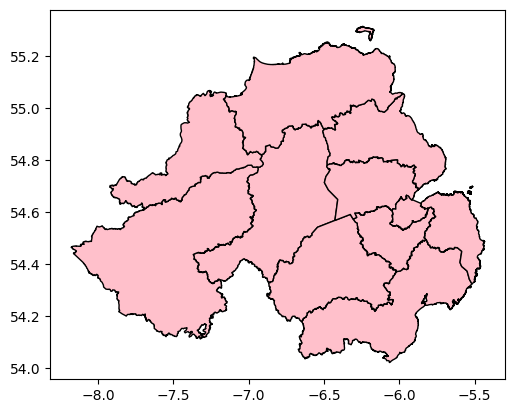

In [59]:
districts.plot(color='pink', edgecolor='black')

geopandas has some functionalities of matplotlib

<Axes: >

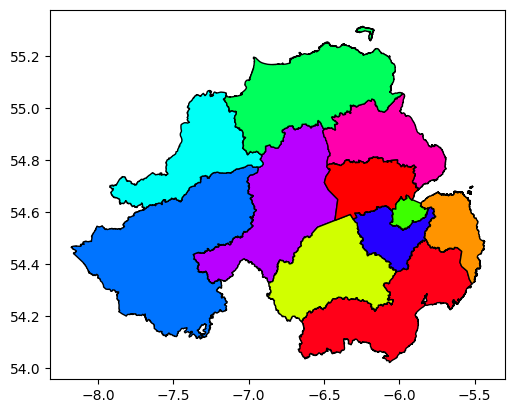

In [31]:
districts.plot(cmap='hsv', edgecolor='black', column='district')

In [19]:
area_of_interest = gpd.read_file("geopandas-dataset/shapefiles/area_of_interest.shp")

In [37]:
atms = gpd.read_file('geopandas-dataset/shapefiles/atms.shp')

<Axes: >

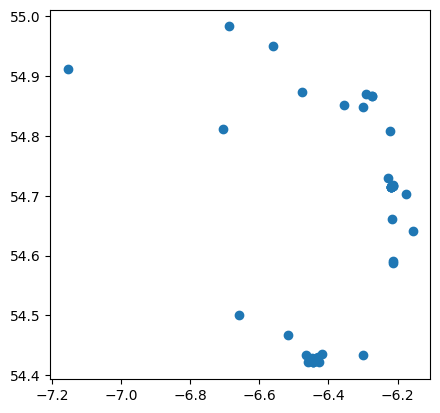

In [42]:
atms.plot()

<Axes: >

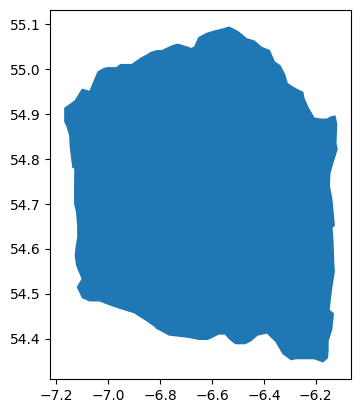

In [20]:
area_of_interest.plot()

<Axes: >

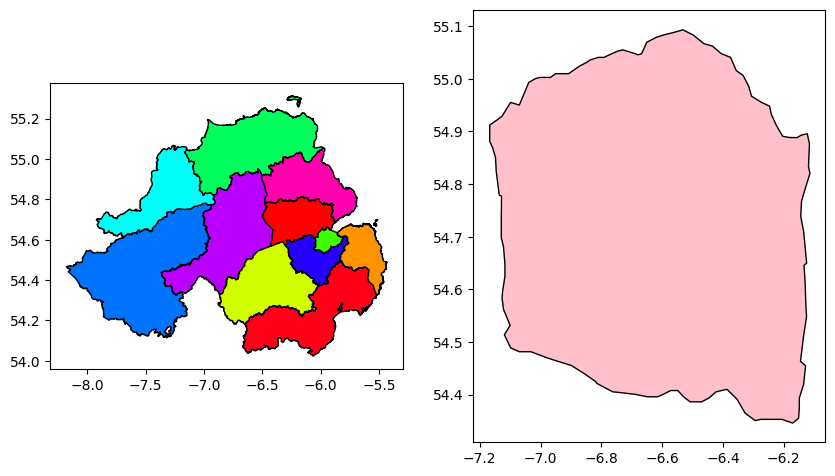

In [44]:
# plot the figure side by side
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
districts.plot(ax=ax1, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax=ax2, color='pink',edgecolor='black')


<Axes: >

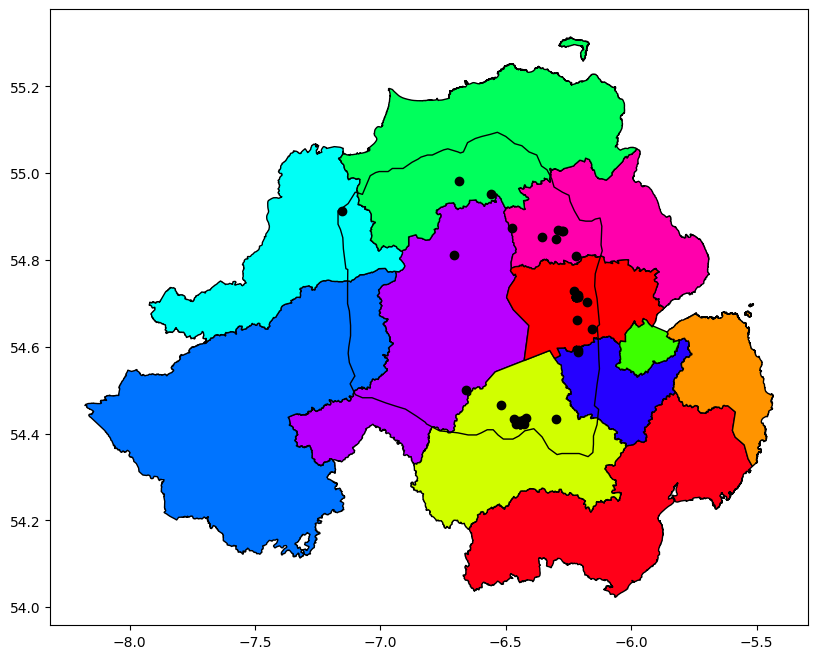

In [45]:
fig, ax = plt.subplots(figsize = (10,8)) 
districts.plot(ax=ax, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax=ax, color='none', edgecolor='black')
atms.plot(ax=ax, color='black')

crs is coordinate system

In [60]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
area_of_interest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
atms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
districts = districts.to_crs(epsg=32629)

<Axes: >

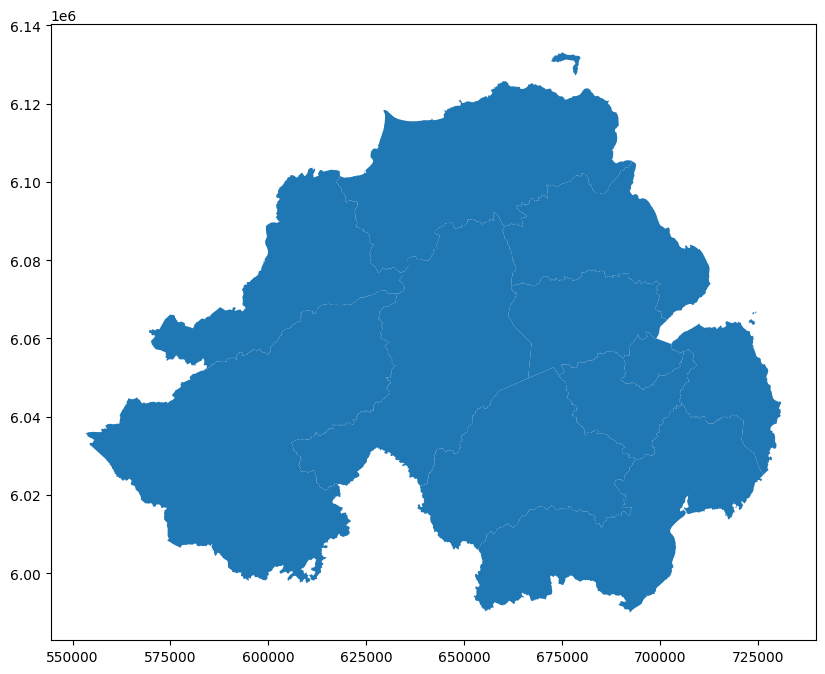

In [55]:
districts.plot(figsize = (10,8))

intersecting layers

<Axes: >

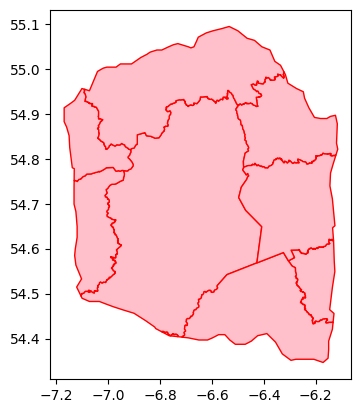

In [66]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how='intersection')
districts_in_aoi.plot(color='pink', edgecolor='red')

calculating area of intersecting layers

In [71]:
districts_in_aoi['area'] = districts_in_aoi.area

/tmp/ipykernel_5678/323244767.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts_in_aoi['area'] = districts_in_aoi.area


In [72]:
districts_in_aoi['area']

0    0.219289
1    0.052293
2    0.021056
3    0.076744
4    0.064487
5    0.036610
6    0.026226
7    0.104881
Name: area, dtype: float64

converting geopandas geodataframe into shapefile

In [74]:
districts_in_aoi.to_file('districts_within_aoi.shp', driver='ESRI Shapefile')

In [75]:
!ls

districts_within_aoi.cpg  districts_within_aoi.shp  geopandas-practice.ipynb
districts_within_aoi.dbf  districts_within_aoi.shx
districts_within_aoi.prj  geopandas-dataset
